In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
with open('data.txt','r') as f:
    data = f.read().split()
i = 0
plt_x = []
plt_y = []
plt_ros_x = []
plt_ros_y = []
plt_f = []
plt_r = []
plt_ros_f = []
plt_ros_r = []
plt_t = []
end = len(data)%9
t0 = float(data[0])
while i < (len(data)-end):
    plt_t.append(float(data[i])-t0)
    plt_x.append(float(data[i+1]))
    plt_y.append(float(data[i+2]))
    plt_ros_x.append(float(data[i+3]))
    plt_ros_y.append(float(data[i+4]))
    plt_f.append(float(data[i+5]))
    plt_r.append(float(data[i+6]))
    plt_ros_f.append(float(data[i+7]))
    plt_ros_r.append(float(data[i+8]))
    i = i + 9


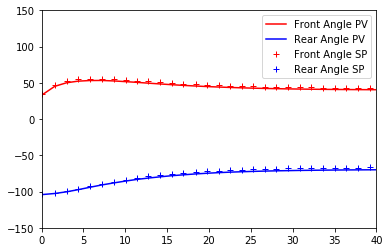

In [35]:
fig, ax = plt.subplots()
ax.set_xlim([0,40])
ax.set_ylim([-150,150])
ax.plot(plt_t,plt_ros_f,'r',plt_t,plt_ros_r,'b',
    plt_t,plt_f,'r+',plt_t,plt_r,'b+')
ax.legend(['Front Angle PV','Rear Angle PV', 'Front Angle SP', 'Rear Angle SP'])              

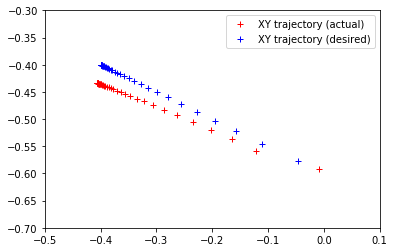

In [38]:
fig, ax = plt.subplots()
ax.set_xlim([-0.5,0.1])
ax.set_ylim([-0.7,-0.3])
ax.plot(plt_ros_x,plt_ros_y,'r+',
    plt_x,plt_y,'b+')
ax.legend(['XY trajectory (actual)','XY trajectory (desired)'])

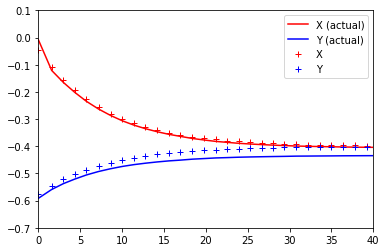

In [37]:
fig, ax = plt.subplots()
ax.set_xlim([0,40])
ax.set_ylim([-0.7,0.1])
ax.plot(plt_t,plt_ros_x,'r',plt_t,plt_ros_y,'b',
    plt_t,plt_x,'r+',plt_t,plt_y,'b+')
ax.legend(['X (actual)','Y (actual)','X','Y'])